<a href="https://colab.research.google.com/github/albertomgranda/APTDetection/blob/main/Machine%20Learning%20Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing


In [ ]:
import numpy as np
import pandas as pd
from sklearn import cluster
from google.colab import files
#uploaded = files.upload()

In [ ]:
import io
df1 = pd.read_csv('dataset.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   alert_type      1278 non-null   object
 1   fase            1278 non-null   object
 2   date            1278 non-null   object
 3   time            1278 non-null   object
 4   severity        1278 non-null   int64 
 5   sign_id         1278 non-null   int64 
 6   rev             1278 non-null   int64 
 7   rule_name       1278 non-null   object
 8   classification  1278 non-null   object
 9   priority        1278 non-null   int64 
 10  protocol        1278 non-null   object
 11  from_addr       1278 non-null   object
 12  from_port       1278 non-null   int64 
 13  to_addr         1278 non-null   object
 14  to_port         1278 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 149.9+ KB


In [ ]:
df1.groupby('fase').size()

fase
3 Delivery               291
4 Exploitation           115
5 Installation           738
6 Command and Control     21
7 Actions                113
dtype: int64

In [ ]:
x1 = df1.drop(['fase','severity','rev','rule_name','alert_type','sign_id'], axis=1)
y1 = df1['fase']

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1278 non-null   object
 1   time            1278 non-null   object
 2   classification  1278 non-null   object
 3   priority        1278 non-null   int64 
 4   protocol        1278 non-null   object
 5   from_addr       1278 non-null   object
 6   from_port       1278 non-null   int64 
 7   to_addr         1278 non-null   object
 8   to_port         1278 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 90.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)


onehot_encoder.fit(x1)
x1 = onehot_encoder.transform(x1)
y1 = label_encoder.fit_transform(y1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20)

# Naive Bayes


#################
MODEL TRAINING:
#################


Accuracy for Naive Bayes - Train:
0.9217221135029354

#################
TEST RESULTS:
#################


Accuracy for Naive Bayes Classifier - Test:
0.8671875

Confusion Matrix for Naive Bayes Classifier saved.

TPR :
Class  0  : 0.8043478260869565
Class  1  : 0.9411764705882353
Class  2  : 0.967741935483871
Class  3  : 0.8333333333333334
Class  4  : 0.4375

TNR :
Class  0  : 0.9428571428571428
Class  1  : 0.9916317991631799
Class  2  : 0.8613861386138614
Class  3  : 1.0
Class  4  : 0.9732142857142857

FPR :
Class  0  : 0.05714285714285714
Class  1  : 0.008368200836820083
Class  2  : 0.13861386138613863
Class  3  : 0.0
Class  4  : 0.026785714285714284

FNR :
Class  0  : 0.1956521739130435
Class  1  : 0.058823529411764705
Class  2  : 0.03225806451612903
Class  3  : 0.16666666666666666
Class  4  : 0.5625

Clasification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.76  

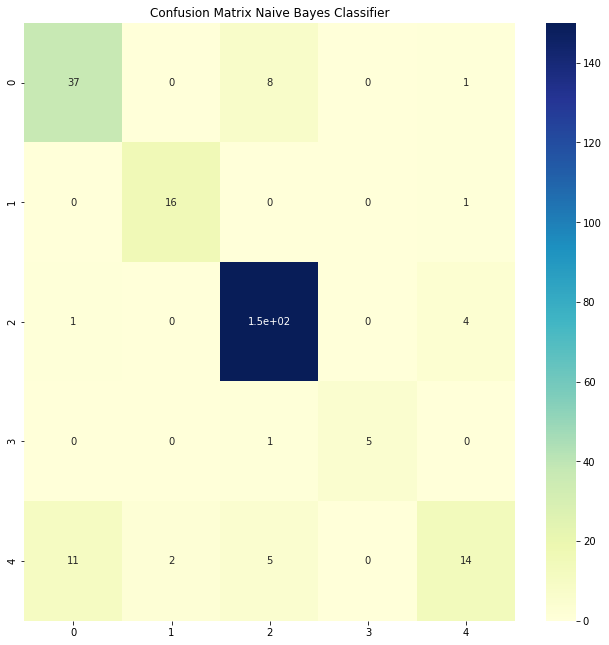

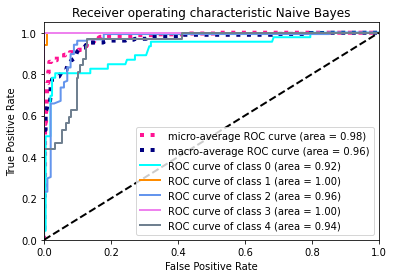

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes            import MultinomialNB
from sklearn.metrics                import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection        import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing          import label_binarize
from sklearn.feature_selection      import SelectKBest, mutual_info_classif
from sklearn.externals              import joblib
from time                           import time
from itertools                      import cycle



t_i = time()

# Plot ROC curves
def plt_roc():
    
    y_ts = label_binarize(df_pred['Real Class'].values, classes=[0,1,2,3,4])
    y_score = pred_prob
    n_classes = y_ts.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_ts.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen', 'lightcoral'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Naive Bayes')
    plt.legend(loc="lower right")
    #plt.show()


print('')
print("#################")
print('MODEL TRAINING:')
print("#################")
print('')
# Train the model for best result in cross validation
d_nb = MultinomialNB()
d_nb.fit(X_train, y_train)

pred_train = d_nb.predict(X_train)
print('')
print('Accuracy for Naive Bayes - Train:')
print(accuracy_score(pred_train, y_train))

print('')
print("#################")
print('TEST RESULTS:')
print("#################")
print('')

#Make the prediction for the test
pred = d_nb.predict(X_test)

print('')
print('Accuracy for Naive Bayes Classifier - Test:')
print(accuracy_score(pred, y_test))

print('')
print("Confusion Matrix for Naive Bayes Classifier saved.")
fig = plt.figure(figsize=(11,11))
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix Naive Bayes Classifier")

# FPR y TPR

FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall or True Positive Rate
TPR = TP/(TP+FN)
print('')
print('TPR :')
for i in range (5):
    print('Class ', i, ' :', TPR[i])
# True negative rate
TNR = TN/(TN+FP)
print('') 
print('TNR :')
for i in range (5):
    print('Class ', i, ' :', TNR[i])
# False positive rate
FPR = FP/(FP+TN)
print('')
print('FPR :')
for i in range (5):
    print('Class ', i, ' :', FPR[i])
# False negative rate
FNR = FN/(TP+FN)
print('')
print('FNR :')
for i in range (5):
    print('Class ', i, ' :', FNR[i])


print('')
print('Clasification Report for Naive Bayes Classifier:')
print(classification_report(y_test, pred))

print('')
print('F1-Score for Naive Bayes Classifier:')
print(f1_score(y_test, pred, average='weighted'))

#Choose the highest probability and type for the prediction
pred_prob = d_nb.predict_proba(X_test)
df_pred = pd.DataFrame(columns=('Prediction', 'Probability', 'Real Class'))
df_pred['Real Class'] = y_test
type_argmax= []
prob_argmax = []
for i in range(len(pred_prob)):
    type_argmax.append(np.argmax(pred_prob[i]))
    prob_argmax.append(pred_prob[i][np.argmax(pred_prob[i])])
df_pred['Prediction'] = type_argmax
df_pred['Probability'] = prob_argmax

print('')
print('ROC Curves for Naive Bayes Classifier saved.')
plt_roc()

print('')
t_f= time()
print('Execution time: ', t_f-t_i)


# Decision Trees


#################
MODEL TRAINING:
#################


Accuracy for Decision Tree - Train:
0.958904109589041

#################
TEST RESULTS:
#################


Accuracy for Decision Tree Classifier - Test:
0.90625

Confusion Matrix for Decision Tree Classifier saved.

TPR :
Class  0  : 0.7777777777777778
Class  1  : 0.9166666666666666
Class  2  : 1.0
Class  3  : 0.75
Class  4  : 0.7741935483870968

TNR :
Class  0  : 0.9533678756476683
Class  1  : 1.0
Class  2  : 0.8770491803278688
Class  3  : 1.0
Class  4  : 1.0

FPR :
Class  0  : 0.046632124352331605
Class  1  : 0.0
Class  2  : 0.12295081967213115
Class  3  : 0.0
Class  4  : 0.0

FNR :
Class  0  : 0.2222222222222222
Class  1  : 0.08333333333333333
Class  2  : 0.0
Class  3  : 0.25
Class  4  : 0.22580645161290322

Clasification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        63
           1       1.00      0.92      0.96        24
          

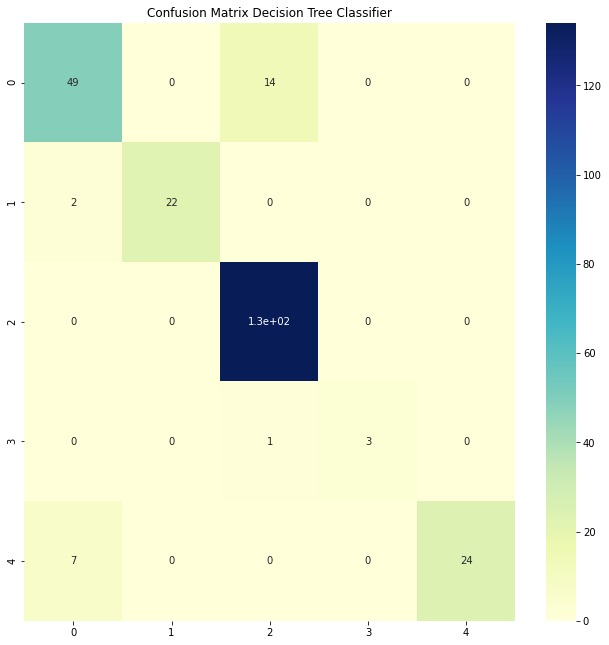

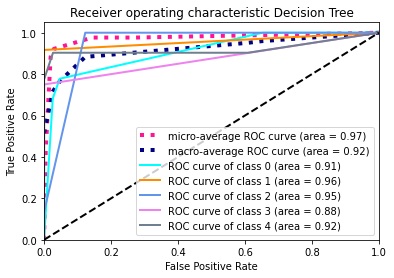

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.metrics                import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection        import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing          import label_binarize
from sklearn.feature_selection      import SelectKBest, mutual_info_classif
from sklearn.externals              import joblib
from time                           import time
from itertools                      import cycle



t_i = time()


# Plot ROC curves
def plt_roc():
    
    y_ts = label_binarize(df_pred['Real Class'].values, classes=[0,1,2,3,4])
    y_score = pred_prob
    n_classes = y_ts.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_ts.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen', 'lightcoral'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Decision Tree')
    plt.legend(loc="lower right")
    #plt.show()


def cross_v():
    print('')
    print("##################################################")
    print('CROSS-VALIDATION FOR HYPERPARAMETER OPTIMIZATION:')
    print("##################################################")
    print('')
    parameters = [{'max_depth': np.arange(15, 30),
                    'random_state': np.arange(1,5)}]

    gs = GridSearchCV(DecisionTreeClassifier(), parameters)

    gs.fit(X_train, y_train)

    # summarize the results of the grid search
    print("Best score: ", gs.best_estimator_)
    print("Best params: ", gs.best_params_)

#cross_v()


print('')
print("#################")
print('MODEL TRAINING:')
print("#################")
print('')
# Train the model for best result in cross validation
d_tree = DecisionTreeClassifier(max_depth= 18, random_state= 4)
d_tree.fit(X_train, y_train)

pred_train = d_tree.predict(X_train)
print('')
print('Accuracy for Decision Tree - Train:')
print(accuracy_score(pred_train, y_train))

print('')
print("#################")
print('TEST RESULTS:')
print("#################")
print('')

#Make the prediction for the test
pred = d_tree.predict(X_test)

print('')
print('Accuracy for Decision Tree Classifier - Test:')
print(accuracy_score(pred, y_test))

print('')
print("Confusion Matrix for Decision Tree Classifier saved.")
fig = plt.figure(figsize=(11,11))
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix Decision Tree Classifier")

# FPR y TPR

FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall or True Positive Rate
TPR = TP/(TP+FN)
print('')
print('TPR :')
for i in range (5):
    print('Class ', i, ' :', TPR[i])
# True negative rate
TNR = TN/(TN+FP)
print('') 
print('TNR :')
for i in range (5):
    print('Class ', i, ' :', TNR[i])
# False positive rate
FPR = FP/(FP+TN)
print('')
print('FPR :')
for i in range (5):
    print('Class ', i, ' :', FPR[i])
# False negative rate
FNR = FN/(TP+FN)
print('')
print('FNR :')
for i in range (5):
    print('Class ', i, ' :', FNR[i])


print('')
print('Clasification Report for Decision Tree Classifier:')
print(classification_report(y_test, pred))

print('')
print('F1-Score for Decision Tree Classifier:')
print(f1_score(y_test, pred, average='weighted'))

#Choose the highest probability and type for the prediction
pred_prob = d_tree.predict_proba(X_test)
df_pred = pd.DataFrame(columns=('Prediction', 'Probability', 'Real Class'))
df_pred['Real Class'] = y_test
type_argmax= []
prob_argmax = []
for i in range(len(pred_prob)):
    type_argmax.append(np.argmax(pred_prob[i]))
    prob_argmax.append(pred_prob[i][np.argmax(pred_prob[i])])
df_pred['Prediction'] = type_argmax
df_pred['Probability'] = prob_argmax

print('')
print('ROC Curves for Decision Tree Classifier saved.')
plt_roc()

print('')
t_f= time()
print('Execution time: ', t_f-t_i)


# SVM


#################
MODEL TRAINING:
#################

Accuracy for SVM - Train:
0.9726027397260274

#################
TEST RESULTS:
#################


Accuracy for SVM - Test:
0.8984375

Confusion Matrix for SVM saved.

TPR :
Class  0  : 0.6607142857142857
Class  1  : 0.9130434782608695
Class  2  : 1.0
Class  3  : 0.6666666666666666
Class  4  : 0.8181818181818182

TNR :
Class  0  : 0.975
Class  1  : 1.0
Class  2  : 0.8653846153846154
Class  3  : 1.0
Class  4  : 0.9700854700854701

FPR :
Class  0  : 0.025
Class  1  : 0.0
Class  2  : 0.1346153846153846
Class  3  : 0.0
Class  4  : 0.029914529914529916

FNR :
Class  0  : 0.3392857142857143
Class  1  : 0.08695652173913043
Class  2  : 0.0
Class  3  : 0.3333333333333333
Class  4  : 0.18181818181818182
Clasification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.66      0.76        56
           1       1.00      0.91      0.95        23
           2       0.92      1.00      0.96       1

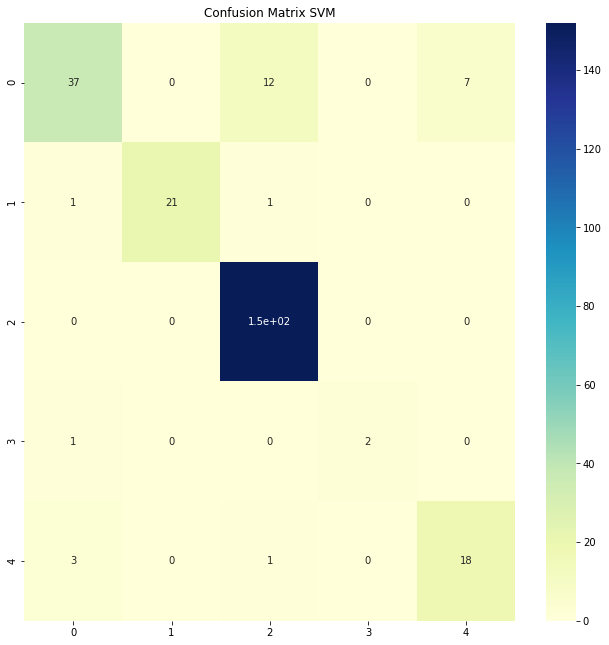

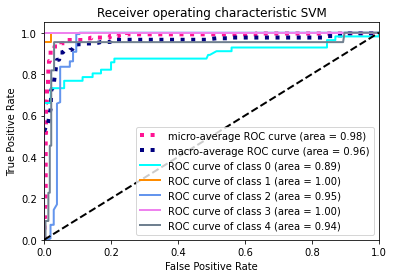

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm                    import SVC
from sklearn.metrics                import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection        import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing          import label_binarize, StandardScaler
from sklearn.feature_selection      import SelectKBest, mutual_info_classif
from scipy.stats                    import zscore
from sklearn.externals              import joblib
from time                           import time
from itertools                      import cycle

t_i = time()



scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Plot ROC curves
def plt_roc():
    
    y_ts = label_binarize(df_pred['Real Class'].values, classes=[0,1,2,3,4])
    y_score = pred_prob
    n_classes = y_ts.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_ts.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen', 'lightcoral'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic SVM')
    plt.legend(loc="lower right")
    #plt.show()



# Set hyper-parameters by cross-validation
def cross_v():
    print('')
    print("#######################################################")
    print('CROSS-VALIDATION FOR HYPERPARAMETER OPTIMIZATION:')
    print("#######################################################")
    print('')
    parameters = {'kernel':('rbf', 'linear'), 
                        'gamma': ('scale', 'auto')
                    }
    
    gs = GridSearchCV(SVC(), parameters)

    gs.fit(X_train, y_train)

    # summarize the results of the grid search
    print("Best score: ", gs.best_estimator_)
    print("Best params: ", gs.best_params_)
#cross_v()


print('')
print("#################")
print('MODEL TRAINING:')
print("#################")
print('')
# Train the model for best result in cross validation
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

pred_train = svm.predict(X_train)
print('Accuracy for SVM - Train:')
print(accuracy_score(pred_train, y_train))

print('')
print("#################")
print('TEST RESULTS:')
print("#################")
print('')


#Make the prediction for the test
pred = svm.predict(X_test)


print('')
print('Accuracy for SVM - Test:')
print(accuracy_score(pred, y_test))

print('')
print("Confusion Matrix for SVM saved.")
fig = plt.figure(figsize=(11,11))
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix SVM")
#print(c_matrix)

# FPR y TPR

FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall or True Positive Rate
TPR = TP/(TP+FN)
print('')
print('TPR :')
for i in range (5):
    print('Class ', i, ' :', TPR[i])
# True negative rate
TNR = TN/(TN+FP)
print('') 
print('TNR :')
for i in range (5):
    print('Class ', i, ' :', TNR[i])
# False positive rate
FPR = FP/(FP+TN)
print('')
print('FPR :')
for i in range (5):
    print('Class ', i, ' :', FPR[i])
# False negative rate
FNR = FN/(TP+FN)
print('')
print('FNR :')
for i in range (5):
    print('Class ', i, ' :', FNR[i])


#print('')
print('Clasification Report for SVM:')
print(classification_report(y_test, pred))

print('')
print('F1-Score for SVM:')
print(f1_score(y_test, pred, average='weighted'))

#Choose the highest probability and type for the prediction
pred_prob = svm.predict_proba(X_test)
df_pred = pd.DataFrame(columns=('Prediction', 'Probability', 'Real Class'))
df_pred['Real Class'] = y_test
type_argmax= []
prob_argmax = []
for i in range(len(pred_prob)):
    type_argmax.append(np.argmax(pred_prob[i]))
    prob_argmax.append(pred_prob[i][np.argmax(pred_prob[i])])
df_pred['Prediction'] = type_argmax
df_pred['Probability'] = prob_argmax

print('')
print('ROC Curves for SVM saved.')
plt_roc()

print('')
t_f= time()
print('Execution time: ', t_f-t_i)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.90625


# Logistic Regression


#################
MODEL TRAINING:
#################


Accuracy for Logistic Regression - Train:
0.9549902152641878

#################
TEST RESULTS:
#################


Accuracy for Logistic Regression Classifier - Test:
0.92578125

Confusion Matrix for Logistic Regression Classifier saved.

TPR :
Class  0  : 0.7735849056603774
Class  1  : 0.9473684210526315
Class  2  : 0.993006993006993
Class  3  : 0.8
Class  4  : 0.8888888888888888

TNR :
Class  0  : 0.9852216748768473
Class  1  : 1.0
Class  2  : 0.8761061946902655
Class  3  : 1.0
Class  4  : 0.990909090909091

FPR :
Class  0  : 0.014778325123152709
Class  1  : 0.0
Class  2  : 0.12389380530973451
Class  3  : 0.0
Class  4  : 0.00909090909090909

FNR :
Class  0  : 0.22641509433962265
Class  1  : 0.05263157894736842
Class  2  : 0.006993006993006993
Class  3  : 0.2
Class  4  : 0.1111111111111111

Clasification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.93      0.

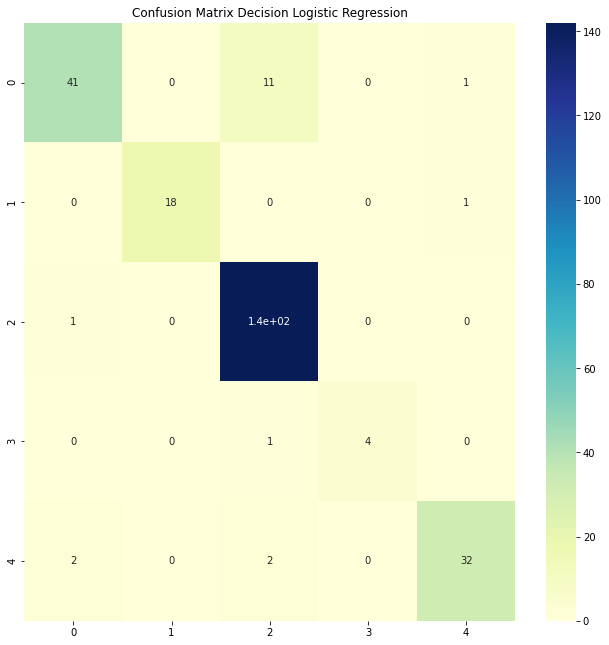

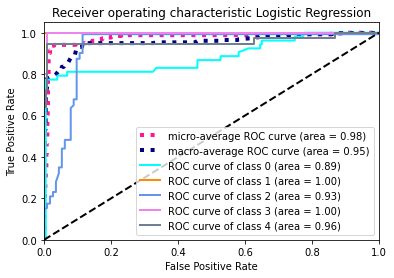

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model           import LogisticRegression
from sklearn.metrics                import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection        import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing          import label_binarize
from sklearn.feature_selection      import SelectKBest, mutual_info_classif
from sklearn.externals              import joblib
from time                           import time
from itertools                      import cycle



t_i = time()


# Plot ROC curves
def plt_roc():
    
    y_ts = label_binarize(df_pred['Real Class'].values, classes=[0,1,2,3,4])
    y_score = pred_prob
    n_classes = y_ts.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_ts.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen', 'lightcoral'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Logistic Regression')
    plt.legend(loc="lower right")
    #plt.show()


def cross_v():
    print('')
    print("##################################################")
    print('CROSS-VALIDATION FOR HYPERPARAMETER OPTIMIZATION:')
    print("##################################################")
    print('')
    parameters = {'penalty': ['l1', 'l2']}

    gs = GridSearchCV(LogisticRegression(), parameters)

    gs.fit(X_train, y_train)

    # summarize the results of the grid search
    print("Best score: ", gs.best_estimator_)
    print("Best params: ", gs.best_params_)

#cross_v()


print('')
print("#################")
print('MODEL TRAINING:')
print("#################")
print('')
# Train the model for best result in cross validation
logistic = LogisticRegression(penalty='l2')
logistic.fit(X_train, y_train)

pred_train = logistic.predict(X_train)
print('')
print('Accuracy for Logistic Regression - Train:')
print(accuracy_score(pred_train, y_train))

print('')
print("#################")
print('TEST RESULTS:')
print("#################")
print('')

#Make the prediction for the test
pred = logistic.predict(X_test)

print('')
print('Accuracy for Logistic Regression Classifier - Test:')
print(accuracy_score(pred, y_test))

print('')
print("Confusion Matrix for Logistic Regression Classifier saved.")
fig = plt.figure(figsize=(11,11))
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix Decision Logistic Regression")

# FPR y TPR

FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall or True Positive Rate
TPR = TP/(TP+FN)
print('')
print('TPR :')
for i in range (5):
    print('Class ', i, ' :', TPR[i])
# True negative rate
TNR = TN/(TN+FP)
print('') 
print('TNR :')
for i in range (5):
    print('Class ', i, ' :', TNR[i])
# False positive rate
FPR = FP/(FP+TN)
print('')
print('FPR :')
for i in range (5):
    print('Class ', i, ' :', FPR[i])
# False negative rate
FNR = FN/(TP+FN)
print('')
print('FNR :')
for i in range (5):
    print('Class ', i, ' :', FNR[i])


print('')
print('Clasification Report for Logistic Regression Classifier:')
print(classification_report(y_test, pred))

print('')
print('F1-Score for Logistic Regression Classifier:')
print(f1_score(y_test, pred, average='weighted'))

#Choose the highest probability and type for the prediction
pred_prob = logistic.predict_proba(X_test)
df_pred = pd.DataFrame(columns=('Prediction', 'Probability', 'Real Class'))
df_pred['Real Class'] = y_test
type_argmax= []
prob_argmax = []
for i in range(len(pred_prob)):
    type_argmax.append(np.argmax(pred_prob[i]))
    prob_argmax.append(pred_prob[i][np.argmax(pred_prob[i])])
df_pred['Prediction'] = type_argmax
df_pred['Probability'] = prob_argmax

print('')
print('ROC Curves for Decision TLogistic Regression saved.')
plt_roc()

print('')
t_f= time()
print('Execution time: ', t_f-t_i)


# Neural Network


#################
MODEL TRAINING:
#################

Restoring model weights from the end of the best epoch.
Epoch 00070: early stopping
Accuracy for MLP - Train:
0.9765166340508806

#################
TEST RESULTS:
#################

Accuracy for MLP - Test:
0.84375

Confusion Matrix for MLP saved.

TPR :
Class  0  : 0.7115384615384616
Class  1  : 1.0
Class  2  : 0.9333333333333333
Class  3  : 0.4
Class  4  : 0.52

TNR :
Class  0  : 0.9264705882352942
Class  1  : 0.9956896551724138
Class  2  : 0.8490566037735849
Class  3  : 1.0
Class  4  : 0.9653679653679653

FPR :
Class  0  : 0.07352941176470588
Class  1  : 0.004310344827586207
Class  2  : 0.1509433962264151
Class  3  : 0.0
Class  4  : 0.03463203463203463

FNR :
Class  0  : 0.28846153846153844
Class  1  : 0.0
Class  2  : 0.06666666666666667
Class  3  : 0.6
Class  4  : 0.48
Clasification Report for MLP:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        52
           1       0.96 

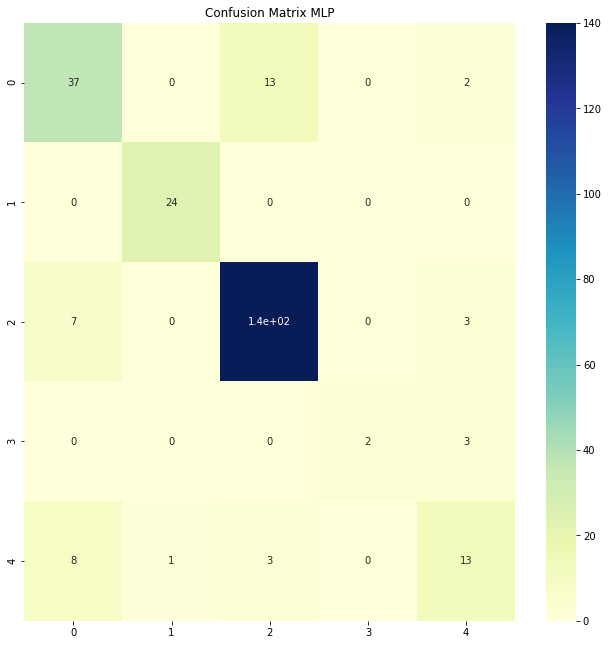

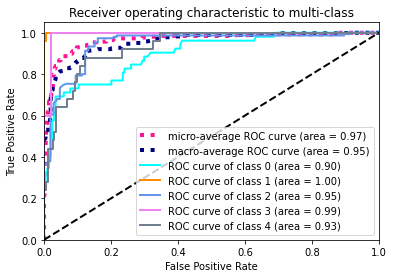

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models                   import Sequential
from keras.layers                   import Dense, Dropout
from keras.layers.embeddings        import Embedding
from tensorflow.keras.callbacks     import EarlyStopping
from sklearn.metrics                import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection        import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection      import SelectKBest, mutual_info_classif
from sklearn.preprocessing          import label_binarize
from scipy.stats                    import zscore
from time                           import time
from itertools                      import cycle

t_i = time()

df_pred = pd.DataFrame(columns=('Prediction', 'Probability', 'Real Class'))
df_pred['Real Class'] = y_test
y_train_col = y_train
y_train = pd.get_dummies(y_train,prefix="cat")
y_test = pd.get_dummies(y_test,prefix="cat")

print('')
print("#################")
print('MODEL TRAINING:')
print("#################")
print('')

# Plot ROC curves
def plt_roc():
    
    y_ts = label_binarize(df_pred['Real Class'].values, classes=[0,1,2,3,4])
    y_score = pred
    n_classes = y_ts.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_ts.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen', 'lightcoral'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    #plt.show()


# Create model with the optimized values
mlp = Sequential()
mlp.add(Dense(42, activation='softsign', input_dim=X_train.shape[1]))
mlp.add(Dense(42, activation='softsign', input_dim=X_train.shape[1]))
mlp.add(Dense(42, activation='softsign', input_dim=X_train.shape[1]))
mlp.add(Dense(25, activation='softsign', input_dim=X_train.shape[1]))
mlp.add(Dense(25, activation='softsign'))
mlp.add(Dense(y_train.shape[1], activation='softmax'))
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
mlp.fit(X_train, y_train, epochs=100, verbose=0,callbacks=[monitor], batch_size=64)

# Training accuracy
pred_train = mlp.predict(X_train)
training = []
for i in range(len(pred_train)):
    training.append(np.argmax(pred_train[i]))
print('Accuracy for MLP - Train:')
print(accuracy_score(training, y_train_col))

print('')
print("#################")
print('TEST RESULTS:')
print("#################")
print('')

#Make the prediction for the test and choose the highest probability and type
pred = mlp.predict(X_test)
type_argmax= []
prob_argmax = []
for i in range(len(pred)):
    type_argmax.append(np.argmax(pred[i]))
    prob_argmax.append(pred[i][np.argmax(pred[i])])

df_pred['Prediction'] = type_argmax
df_pred['Probability'] = prob_argmax


print('Accuracy for MLP - Test:')
print(accuracy_score(type_argmax, df_pred['Real Class']))
print('')


print("Confusion Matrix for MLP saved.")
fig = plt.figure(figsize=(11,11))
c_matrix = confusion_matrix(df_pred['Real Class'], type_argmax)
sns.heatmap(c_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix MLP")

#print(c_matrix)


# FPR y TPR

FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall or True Positive Rate
TPR = TP/(TP+FN)
print('')
print('TPR :')
for i in range (5):
    print('Class ', i, ' :', TPR[i])
# True negative rate
TNR = TN/(TN+FP)
print('') 
print('TNR :')
for i in range (5):
    print('Class ', i, ' :', TNR[i])
# False positive rate
FPR = FP/(FP+TN)
print('')
print('FPR :')
for i in range (5):
    print('Class ', i, ' :', FPR[i])
# False negative rate
FNR = FN/(TP+FN)
print('')
print('FNR :')
for i in range (5):
    print('Class ', i, ' :', FNR[i])




print('Clasification Report for MLP:')
print(classification_report(df_pred['Real Class'], type_argmax))

print('')
print('F1-Score for MLP:')
print(f1_score(df_pred['Real Class'], type_argmax, average='weighted'))

print('')
print('ROC Curves for MLP saved.')
plt_roc()

print('')
t_f= time()
print('Execution time: ', t_f-t_i)
